In [41]:
from urllib import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [42]:
Data_T = pd.read_csv("ncaa_allstar_data_T.csv")
Data_F = pd.read_csv("ncaa_allstar_data_F.csv")
y_T = Data_T['allstar']
y_F = Data_F['allstar']
X_T = Data_T.drop(['PLAYER', 'TEAM', 'allstar'], axis = 1)
X_F = Data_F.drop(['PLAYER', 'TEAM', 'allstar'], axis = 1)

# Split data

In [43]:
def splitPermuteByNumber(X, y, cutoff):
    t_ind = X.index
    t_ind_perm = np.random.permutation(len(t_ind))
    perm = t_ind[t_ind_perm]

    ind = t_ind[t_ind_perm]
    t_ind_te = perm[:cutoff]
    t_ind_tr = perm[cutoff:]
    return X.loc[t_ind_te], X.loc[t_ind_tr], y.loc[t_ind_te], y.loc[t_ind_tr]

def splitPermuteByPercent(X, y, percent):
    cutoff = int(len(X) * percent)
    return splitPermuteByNumber(X, cutoff)

In [44]:
Xt_te, Xt_tr, yt_te, yt_tr = splitPermuteByNumber(X_T, y_T, 20)
Xf_te, Xf_tr, yf_te, yf_tr = splitPermuteByNumber(X_F, y_F, 20)

X_traning_list = ([Xt_tr] * 1 + [Xf_tr])
y_traning_list = ([yt_tr] * 1 + [yf_tr])

X_te = pd.concat([Xt_te, Xf_te])
X_tr = pd.concat(X_traning_list)
y_te = pd.concat([yt_te, yf_te])
y_tr = pd.concat(y_traning_list)

In [45]:
print X_tr.shape
print X_te.shape

# print Xt_tr.shape
# print Xt_te.shape
# print Xf_tr.shape
# print Xf_te.shape

(3730, 23)
(40, 23)


# Tools

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

def showROCCurve(y_te, y_pred):
    precision, recall, threshold = precision_recall_curve(y_te, y_pred)
    average_precision = average_precision_score(y_te, y_pred)
    
    for p, r, t in zip(precision, recall, threshold):
        print "%.2f\t%.2f\t%.2f" % (p, r, t)
        
    fpr, tpr, _ = roc_curve(y_te, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # plt.clf() will just clear the figure - you can still paint another plot onto it.
    lw = 2
    plt.clf()
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)    
    plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve (AUC = %0.2f)' % average_precision)
    plt.xlabel('False Positive Rate(ROC)/Recall(PRC)')
    plt.ylabel('True Positive Rate(ROC)/Precision(PRC)')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="lower right")
    plt.show()

# Linear regression

0.54	1.00-0.00
0.53	0.95-0.00
0.54	0.95-0.00
0.56	0.950.00
0.55	0.900.00
0.56	0.900.00
0.58	0.900.00
0.60	0.900.00
0.59	0.850.00
0.57	0.800.01
0.59	0.800.01
0.58	0.750.01
0.60	0.750.01
0.62	0.750.01
0.61	0.700.01
0.64	0.700.01
0.62	0.650.01
0.65	0.650.01
0.68	0.650.01
0.67	0.600.01
0.71	0.600.01
0.75	0.600.01
0.80	0.600.02
0.86	0.600.02
0.85	0.550.02
0.83	0.500.02
0.82	0.450.02
0.80	0.400.02
0.78	0.350.03
0.75	0.300.03
0.86	0.300.03
0.83	0.250.03
0.80	0.200.03
0.75	0.150.04
0.67	0.100.04
0.50	0.050.05
1.00	0.050.06


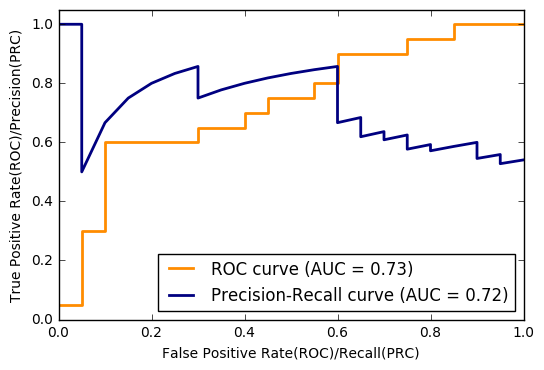

In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_tr, y_tr)
y_pred = regr.predict(X_te)
showROCCurve(y_te, y_pred)

# Linear Discriminant Analysis

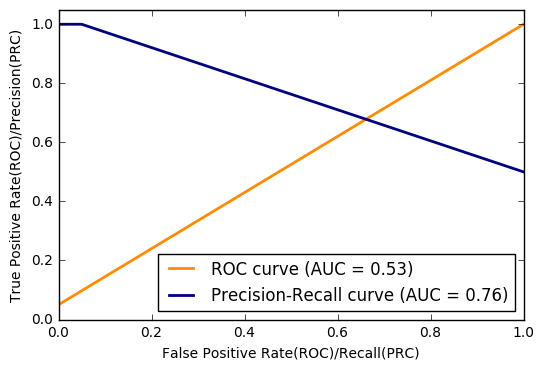

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_tr, y_tr).predict(X_te)
showROCCurve(y_te, y_pred)

# QuadraticDiscriminantAnalysis

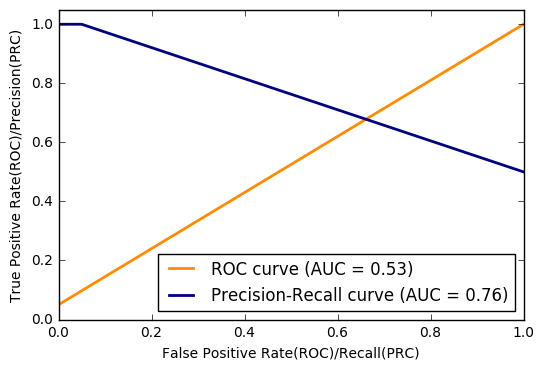

In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariances=True)
y_pred = qda.fit(X_tr, y_tr).predict(X_te)
showROCCurve(y_te, y_pred)

# Imbalanced-learn Pipeline


1.11.2
(2827, 23) (943, 23) (2827,) (943,)
             precision    recall  f1-score   support

      False       0.99      1.00      0.99       933
       True       0.00      0.00      0.00        10

avg / total       0.98      0.99      0.98       943



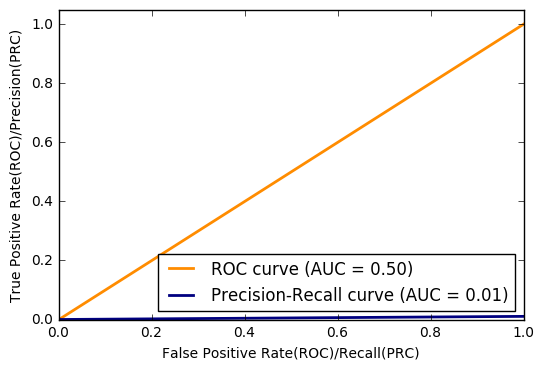

In [50]:
print np.version.version
from sklearn.cross_validation import train_test_split as tts
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)


# Create the samplers
enn = EditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours()
pca = PCA(n_components=23)

# Create teh classifier
X = pd.concat([X_tr, X_te])
y = pd.concat([y_tr, y_te])
knn = KNN(2)
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)


print X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Add one transformers and two samplers in the pipeline object
pipeline = make_pipeline(pca, enn, renn, knn)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
showROCCurve(y_test, y_pred)

# Predict 2016 Data

In [51]:
data_2016 = pd.read_csv("ncaa_allstar_2016_data_F.csv")
names_2016 = data_2016['PLAYER']
X_2016 = data_2016.drop(['PLAYER', 'TEAM', 'allstar'], axis = 1)
y_pred = regr.predict(X_2016)
names_2016.iloc[np.argmax(y_pred)]

'Markelle Fultz'